<a href="https://colab.research.google.com/github/KeithKimani/Phase-1-Project/blob/main/Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Aviation Accident Analysis Project**

## Introduction
This project analyzes aviation accident data to identify low-risk aircraft for acquisition by our company. The analysis includes data cleaning, exploratory data analysis (EDA), and visualization techniques.

## Business Understanding
The following key questions guide our analysis:
- What are the historical accident rates for different aircraft types?
- What trends are evident in accident causes over time?
- Which aircraft types have the lowest accident rates?
- How can we mitigate risks associated with aircraft operations?

# **Load the Data with Pandas**

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


### Aviation
In the cell below, load AviationData.csv:

In [20]:
# Load the dataset, try using a different encoding
df = pd.read_csv('/content/AviationData.csv', encoding='latin-1')

# Display basic information about the dataset
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

<ipython-input-20-ddbefbc0c802>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/AviationData.csv', encoding='latin-1')


In [21]:
# Display the first few rows of the dataset

print(df.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

Now you want to get familiar with the data.

This step includes:

Understanding the dimensionality of your dataset

Investigating what type of data it contains, and the data types used to store it

Discovering how missing values are encoded, and how many there are

In [22]:
# Check for missing values in the dataset
# Fill missing values with 0 for specific columns

missing_values = aviation_data.isnull().sum()

print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64


In [23]:
# Changed column name to 'Total.Minor.Injuries'

aviation_data['Total.Minor.Injuries'].fillna(0, inplace=True)

In [24]:
# Changed column name to 'Total.Uninjured'

aviation_data['Total.Uninjured'].fillna(0, inplace=True)

## **## Identifying and Handling Missing Values:**


In [25]:
# Convert 'Latitude' and 'Longitude' columns to numeric type

aviation_data['Latitude'] = pd.to_numeric(aviation_data['Latitude'], errors='coerce')

aviation_data['Longitude'] = pd.to_numeric(aviation_data['Longitude'], errors='coerce')

In [26]:
# Fill missing values in numerical columns with mean

aviation_data['Latitude'].fillna(aviation_data['Latitude'].mean(), inplace=True)

aviation_data['Longitude'].fillna(aviation_data['Longitude'].mean(), inplace=True)

In [27]:
# Fill missing values in categorical columns with mode

aviation_data['Make'].fillna(aviation_data['Make'].mode()[0], inplace=True)

aviation_data['Model'].fillna(aviation_data['Model'].mode()[0], inplace=True)

## **Imputation of Missing Values**

In [9]:
# Define which columns to impute

numerical_cols = ['Latitude', 'Longitude', 'Total.Fatal.Injuries', 'Total.Serious.Injuries']

categorical_cols = ['Make', 'Model', 'Aircraft.Category']

In [10]:
# Import the necessary class from scikit-learn

from sklearn.impute import SimpleImputer

In [11]:
# Create an imputer for numerical columns

num_imputer = SimpleImputer(strategy='mean')

aviation_data[numerical_cols] = num_imputer.fit_transform(aviation_data[numerical_cols])

In [12]:
# Create an imputer for categorical columns

cat_imputer = SimpleImputer(strategy='most_frequent')

aviation_data[categorical_cols] = cat_imputer.fit_transform(aviation_data[categorical_cols])

## **Checking for Missing Values After Imputation and Combine Dataframes**

In [13]:
missing_values_after = aviation_data.isnull().sum()

print("Missing Values After Imputation:\n", missing_values_after[missing_values_after > 0])

Missing Values After Imputation:
 Location                     7
Country                    114
Airport.Code             11778
Airport.Name             10000
Aircraft.damage            551
Registration.Number          5
Amateur.Built                1
Number.of.Engines          286
Engine.Type                  4
FAR.Description          21066
Schedule                 20640
Purpose.of.flight           34
Air.carrier              23434
Total.Uninjured             88
Weather.Condition            2
Broad.phase.of.flight      130
Publication.Date         12444
dtype: int64


In [14]:
# Combine two dataframes

df2 = pd.read_csv('/content/USState_Codes.csv')

combined_df = pd.concat([aviation_data, df2], ignore_index=True)

In [16]:
# Grouping by Aircraft Category and counting accidents

accident_counts = aviation_data.groupby('Aircraft.Category').size().reset_index(name='Total Accidents')

# Display the aggregated data

print(accident_counts)
print(aviation_data.columns)

  Aircraft.Category  Total Accidents
0          Airplane            24298
1           Balloon               30
2            Glider               53
3         Gyrocraft               15
4        Helicopter              295
5        Ultralight                1
6           Unknown                1
Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')



## **Measures of Centrality and Dispersion for Total Fatal Injuries**

In [17]:
# Calculate measures of centrality and dispersion for Total Fatal Injuries

mean_fatal_injuries = aviation_data['Total.Fatal.Injuries'].mean()

median_fatal_injuries = aviation_data['Total.Fatal.Injuries'].median()

std_fatal_injuries = aviation_data['Total.Fatal.Injuries'].std()

print(f"Mean Total Fatal Injuries: {mean_fatal_injuries}")

print(f"Median Total Fatal Injuries: {median_fatal_injuries}")

print(f"Standard Deviation of Total Fatal Injuries: {std_fatal_injuries}")

Mean Total Fatal Injuries: 0.4432104792124319
Median Total Fatal Injuries: 0.0
Standard Deviation of Total Fatal Injuries: 3.6971680498365775



## **Creating a Subset for Accident with Serious Injuries**

In [18]:
# Create a subset for accidents with serious injuries greater than zero

serious_injury_subset = aviation_data[aviation_data['Total.Serious.Injuries'] > 0]

# Display the subset

print(serious_injury_subset.head())

          Event.Id Investigation.Type Accident.Number  Event.Date  \
2   20061025X01555           Accident      NYC07LA005  1974-08-30   
4   20041105X01764           Accident      CHI79FA064  1979-08-02   
5   20170710X52551           Accident      NYC79AA106  1979-09-17   
24  20020917X02255           Accident      LAX82FA040  1982-01-03   
34  20020917X01880           Accident      CHI82FA019  1982-01-04   

               Location        Country   Latitude   Longitude Airport.Code  \
2         Saltville, VA  United States  36.922223  -81.878056          NaN   
4            Canton, OH  United States  41.282976 -104.947540          NaN   
5            BOSTON, MA  United States  42.445277  -70.758333          NaN   
24  10 NM W LEE VIN, CA  United States  41.282976 -104.947540          NaN   
34       FORT WAYNE, IN  United States  41.282976 -104.947540          NaN   

   Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
2           NaN  ...          Personal   


## **Extract Unique Airplane Makes**

In [19]:
# Extract unique makes of airplanes

unique_airplane_makes = aviation_data['Make'].unique()

# Convert to a list for better readability

unique_airplane_makes_list = unique_airplane_makes.tolist()

# Display the unique makes

print("Unique Makes of Airplanes:")

for make in unique_airplane_makes_list:
    print(make)

Unique Makes of Airplanes:
Stinson
Piper
Cessna
Rockwell
Mcdonnell Douglas
North American
Beech
Bellanca
Navion
Enstrom
Smith
Bell
Grumman
Beechcraft
Maule
Air Tractor
Aerospatiale
Mooney
Boeing
Curtis
Schleicher
Quickie
Lockheed
Embraer
Hughes
Swearingen
De Havilland
Bell Helicopter
Bede Aircraft
Convair
Beachner
Canadair
Douglas
Sons Mustang
Dassault/sud
Sikorsky
Bell/textron
Robertson
Aeronca
Smith Miniplane
Mitsubishi
Mcdonnell-douglas
Taylorcraft
Ted Smith
Robinson
Raven
Ercoupe
Rockwell Comdr
Howard Aircraft Corp.
Porterfield
Nihon
Great Lakes
Balloon Works
Pitts
Fairchild Hiller
Kaman
Weatherly
Eagle
Barnes
Schweizer
Starduster Ii
Homebuilt
Smith Mini
Smith Aerostar
Rockwell Intl
Hiller
Schreder
Varga
Hatz
Nord Aviation
Crook
American Yankee
Helio
Colonial
Gulfstream American
Benson
Luscombe
Mckinley Eaa
Airmate
B??lkow
Snow
Rockwell Commander
Rotorway
Gulfstream
Champion
Fournier Aviation
Curtiss-wright
Aero Commander
Mbb-bolkow
Piper-aerostar
Rockwell Intl.
Ryan
Jurca
Martin-p


## **Aggregating Models Into a List**

In [20]:
# Group by Make and aggregate models into a list

models_by_make = aviation_data.groupby('Make')['Model'].unique().reset_index()

# Display the results

print("Models for Each Make:")

for index, row in models_by_make.iterrows():
    print(f"{row['Make']}: {', '.join(row['Model'])}")

Models for Each Make:
Abbott: GYROPLANE
Acroduster: SA-750
Adams: A55, AB, A55S, A-60, AX-9, UNKNOWN
Adams William C: QUICKIE Q1
Advanced Technology: PREDATOR 480
Aero Commander: 100, 680F, S2R, 680FL, 500S, 112TC, 681, 112, 520, 680, 560E, 680W, 500, 680FL P, S-2R, 600 S-2D, 500B, CALLAIR A-9, CALLAIR A-9B, 680-F, 685, A-9, 100-180, 690A, 1121, A-98, 500-B, 560F, 680T, THRUSH S2R, 690, 680V, CALLAIR A-9A, 600S-20, 680-FP, 560A, CALLAIR A9B, 112A, S-2D, A-9B, AC-100, CALLAIR B-1A, 560-A, CALLAIR A9-B, 560-F, 720, 200D, 680E, 560, 500U, LARK 100-180, 680FLP
Aero Mirage: TC-2
Aerodynamics .: HAWK MKII
Aerofab Inc.: LAKE LA-4-250, LAKE LA 4-200, LAKE LA-250
Aeromot: AURA
Aeronca: 7BCM, 7AC, 7EC, 11AC, 65-TF, AR-58, C-3, 7GC, 11BC, 65-TC, 11CC, CHAMPION 7AC, C3, 65CA, 7ECA, 65-LB, 7BCM L-16A, O-58B, 7AC CHAMP, 7DC, O-58A, 65-C, 15AC, 60-TF, 7CCM, 65-LA, 058B, 11-AC, 7FC, L-3B, 65-TAC, 15 AC SEDAN, 7GCB, CHAMP 7AC, O58B, 0-58B, S11BC, 65-TL, 7KCAB, 50F, 65-CA, 65TL
Aeronca Champ: 7EC
Aeronc


## **Answering Question 1**

The code below uses the dataframe created to find the historical accident rates for different aircraft types

In [32]:
# Count occurrences of each Make and Model combination

accident_counts = aviation_data.groupby(['Make', 'Model']).size().reset_index(name='Total Accidents')

# Sort the DataFrame by Total Accidents in descending order

accident_counts_sorted = accident_counts.sort_values(by='Total Accidents', ascending=False)

# Display the results in a DataFrame

print("Airplane Makes and Models Ordered by Total Accidents:")

print(accident_counts_sorted)

Airplane Makes and Models Ordered by Total Accidents:
          Make      Model  Total Accidents
5754    Cessna        152             2212
5776    Cessna        172             1254
5820    Cessna       172N              996
15116    Piper  PA-28-140              812
5729    Cessna        150              716
...        ...        ...              ...
8325   Embraer    ERJ-135                1
8326   Embraer  ERJ-135ER                1
8327   Embraer  ERJ-145LR                1
8328   Embraer    ERJ-170                1
20184  unknown        kit                1

[20185 rows x 3 columns]



## **Checking for Invalid Publication.Date Entries and Displaying Them**

In [22]:
# Display the original Publication.Date values for rows that resulted in NaT

invalid_entries = aviation_data[aviation_data['Publication.Date'].isnull()]

# Show a sample of invalid entries

print("Invalid Publication.Date entries:")

print(invalid_entries[['Publication.Date']].head(20))



Invalid Publication.Date entries:
     Publication.Date
0                 NaN
2950              NaN
3600              NaN
3601              NaN
3602              NaN
3603              NaN
3604              NaN
3605              NaN
3606              NaN
3607              NaN
3608              NaN
3609              NaN
3610              NaN
3611              NaN
3612              NaN
3613              NaN
3614              NaN
3615              NaN
3616              NaN
3617              NaN



## **Handle NaT Values and Drop Rows With Invalid Publication.Date**

In [23]:
# Drop rows with invalid Publication.Date

aviation_data.dropna(subset=['Publication.Date'], inplace=True)

In [24]:
# Fill NaT values with a placeholder date

aviation_data['Publication.Date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)

In [25]:
# Convert 'Publication.Date' to string type before applying string methods

aviation_data['Publication.Date'] = aviation_data['Publication.Date'].astype(str)


In [26]:
# Replace specific formatting issues

aviation_data['Publication.Date'] = aviation_data['Publication.Date'].str.replace('/', '-', regex=False)

In [27]:
# Convert 'Publication.Date' back to datetime

aviation_data['Publication.Date'] = pd.to_datetime(aviation_data['Publication.Date'], errors='coerce')

<ipython-input-27-548ea1f64c70>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  aviation_data['Publication.Date'] = pd.to_datetime(aviation_data['Publication.Date'], errors='coerce')


## **Accidents After Handling Invalid Dates and Plot Trends**

In [28]:
# Group by year and count accidents again after handling invalid dates

accidents_per_year = aviation_data.groupby(aviation_data['Publication.Date']
                                           .dt.year).size().reset_index(name='Total Accidents')

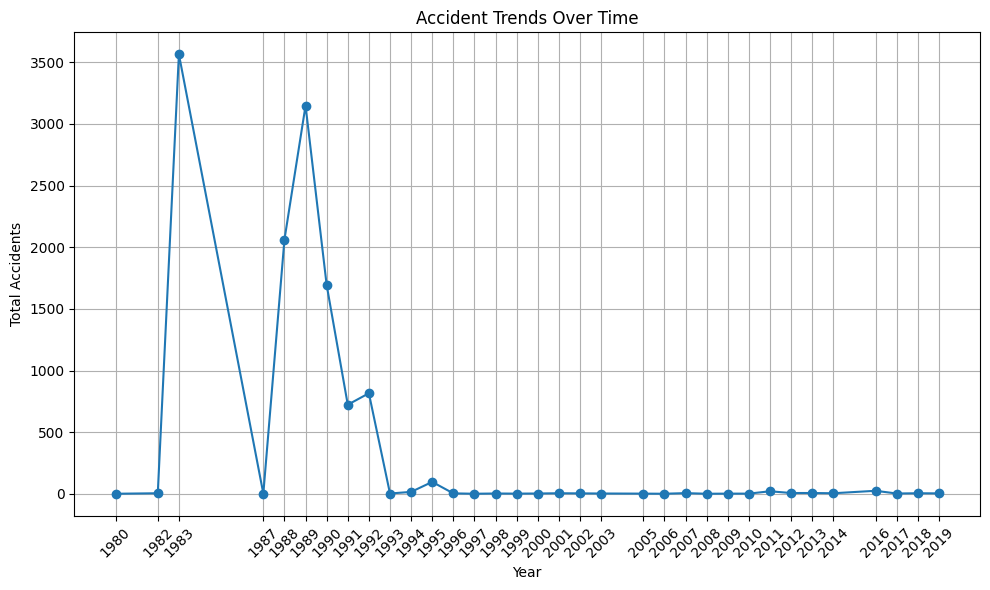

In [30]:
# Import the matplotlib library
import matplotlib.pyplot as plt

# Plotting the trend
plt.figure(figsize=(10, 6))

plt.plot(accidents_per_year['Publication.Date'], accidents_per_year['Total Accidents'], marker='o')
 # Use 'Total Accidents'

plt.title('Accident Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.xticks(accidents_per_year['Publication.Date'], rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


## **Correlation Heatmap of Various Injury Types**

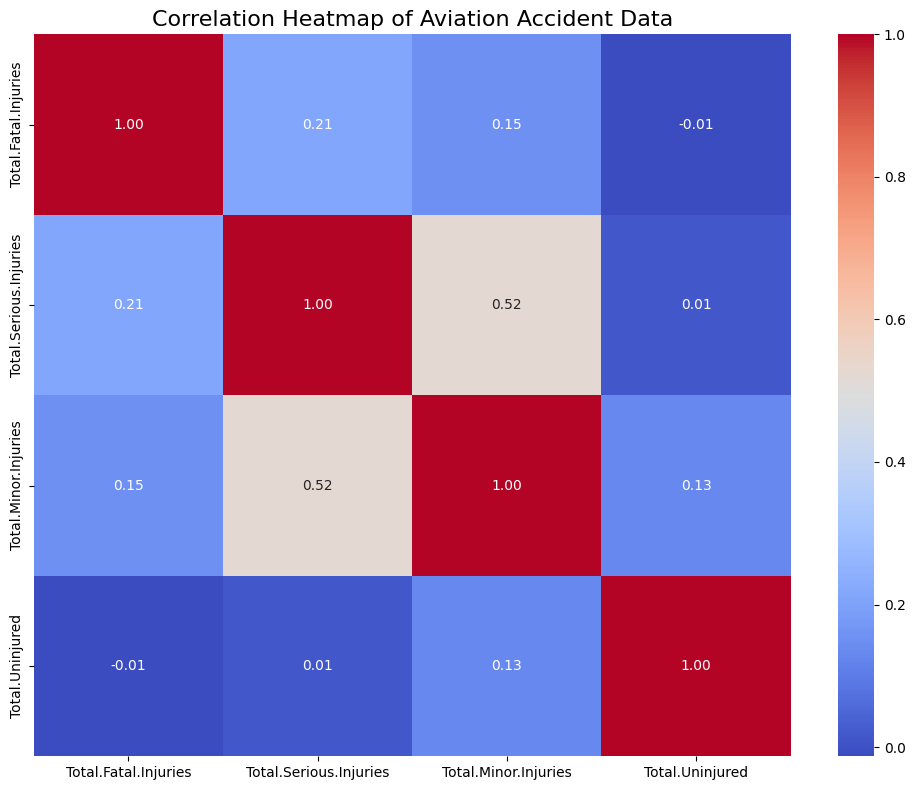

In [32]:
# Import the seaborn library
import seaborn as sns

correlation_matrix = aviation_data[['Total.Fatal.Injuries', 'Total.Serious.Injuries',
                                     'Total.Minor.Injuries', 'Total.Uninjured']].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Heatmap of Aviation Accident Data', fontsize=16)

plt.tight_layout()

plt.show()


## **Plot Distribution of Total Fatal Injuries Using a Histogram**

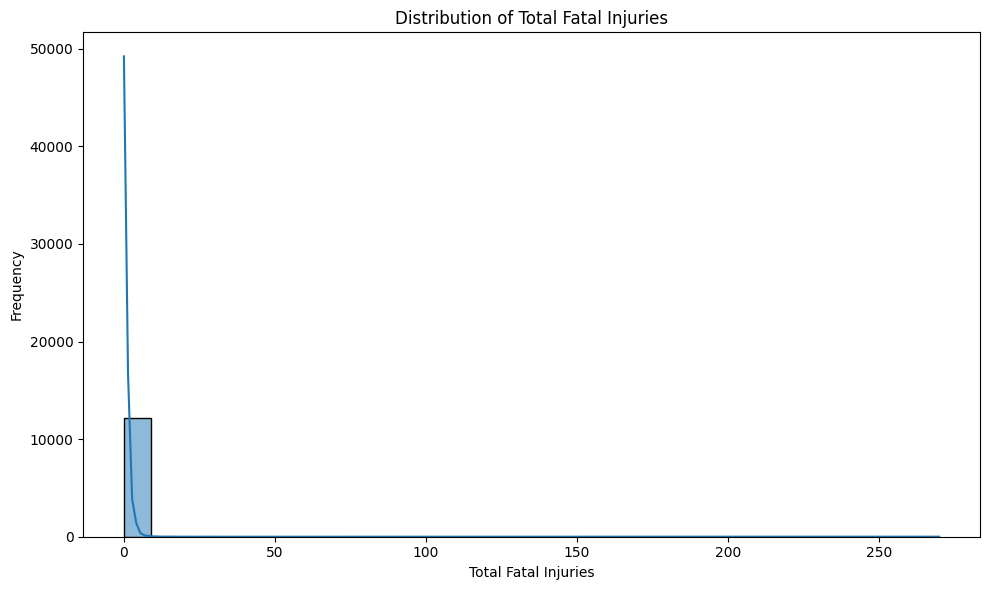

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.histplot(aviation_data['Total.Fatal.Injuries'], bins=30, kde=True)

plt.title('Distribution of Total Fatal Injuries')

plt.xlabel('Total Fatal Injuries')

plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

## **Answering Question 3**

What trends are evident in accident causes over time?

<Figure size 1200x600 with 0 Axes>

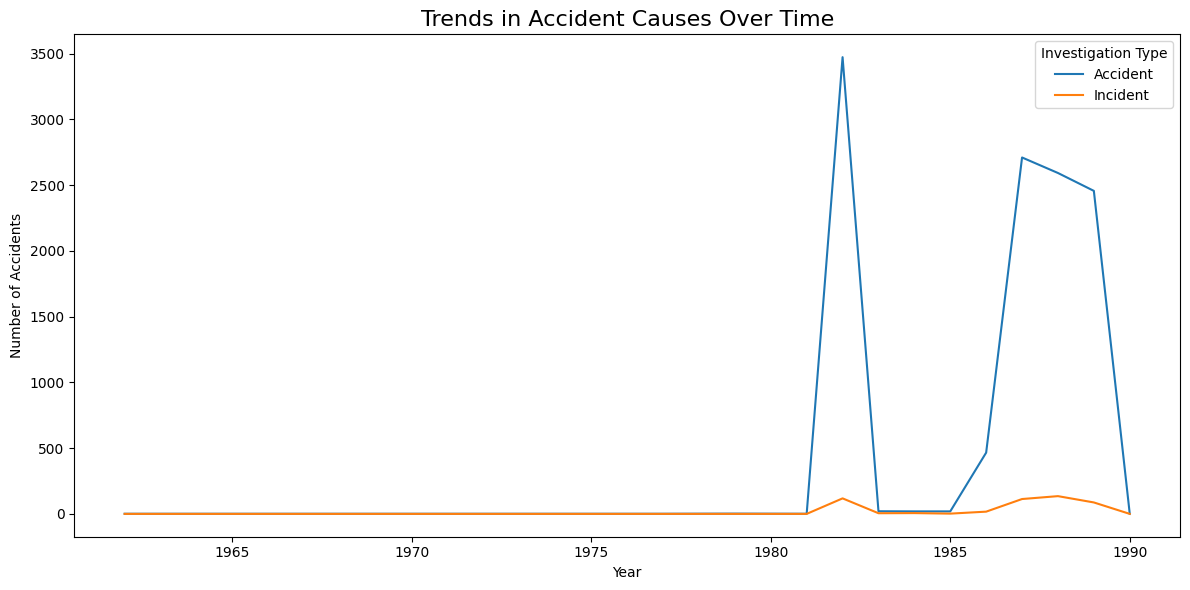

In [34]:
# Convert 'Event.Date' to datetime format if not already done

aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'])

# Extract year from the date

aviation_data['Year'] = aviation_data['Event.Date'].dt.year

# Group by year and investigation type to count accidents

trends = aviation_data.groupby(['Year', 'Investigation.Type']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))

trends.plot(kind='line', figsize=(12, 6))

plt.title('Trends in Accident Causes Over Time', fontsize=16)

plt.xlabel('Year')

plt.ylabel('Number of Accidents')

plt.legend(title='Investigation Type')

plt.tight_layout()

plt.show()


## **Bar Chart of Top Countries with Most Aviation Accidents**

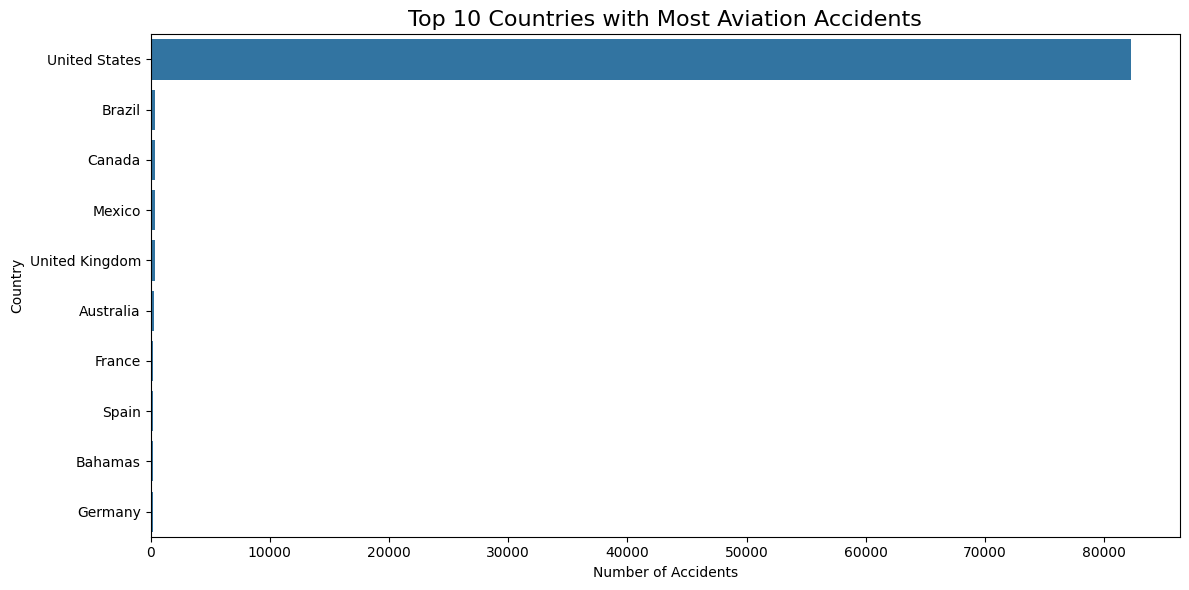

In [17]:
accident_by_country = aviation_data['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=accident_by_country.values, y=accident_by_country.index)
plt.title('Top 10 Countries with Most Aviation Accidents', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## **Analyzing Top 20 Airplane Makes with Most Accidents**

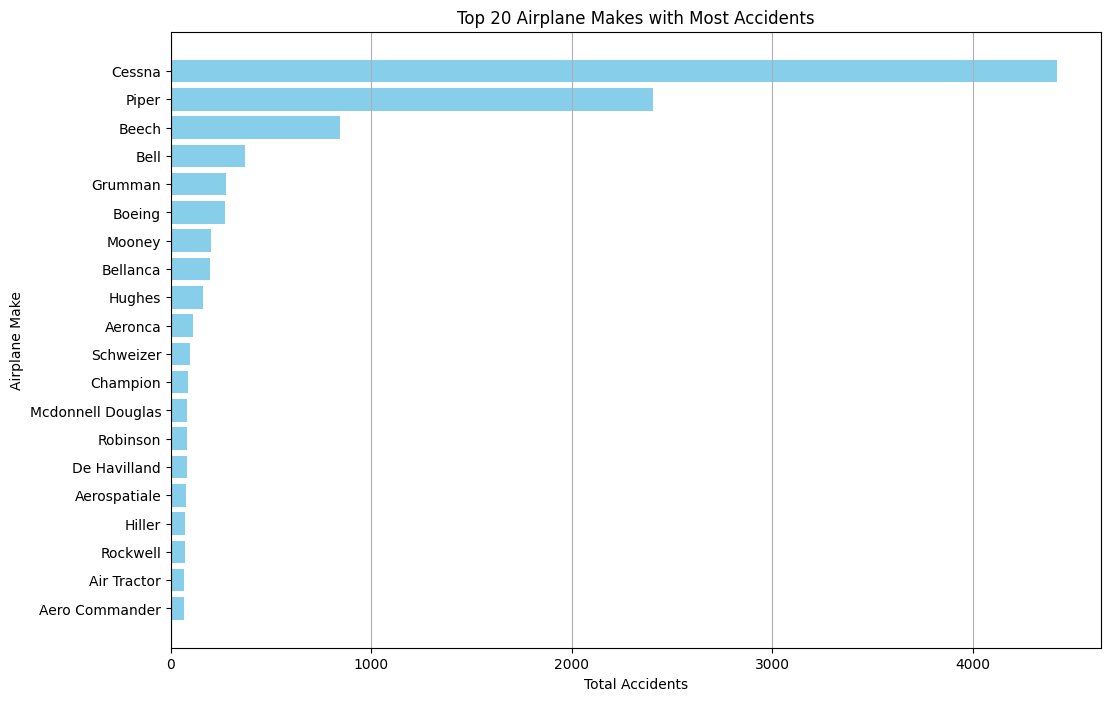

In [38]:
# Calculate accident counts for each airplane make
make_accident_counts = aviation_data['Make'].value_counts()

# Get the top 20 makes with the most accidents
top_20_makes = make_accident_counts.head(20).reset_index()

# Rename columns for clarity
top_20_makes.columns = ['Make', 'Total Accidents']

# Now you can use this DataFrame to create your plot
plt.figure(figsize=(12, 8))
plt.barh(top_20_makes['Make'], top_20_makes['Total Accidents'], color='skyblue')
plt.title('Top 20 Airplane Makes with Most Accidents')
plt.xlabel('Total Accidents')
plt.ylabel('Airplane Make')
plt.gca().invert_yaxis()  # Invert y-axis to have the make with most accidents on top
plt.grid(axis='x')
plt.show()

## **Box Plot Showing Accident Severity by Aircraft Category**

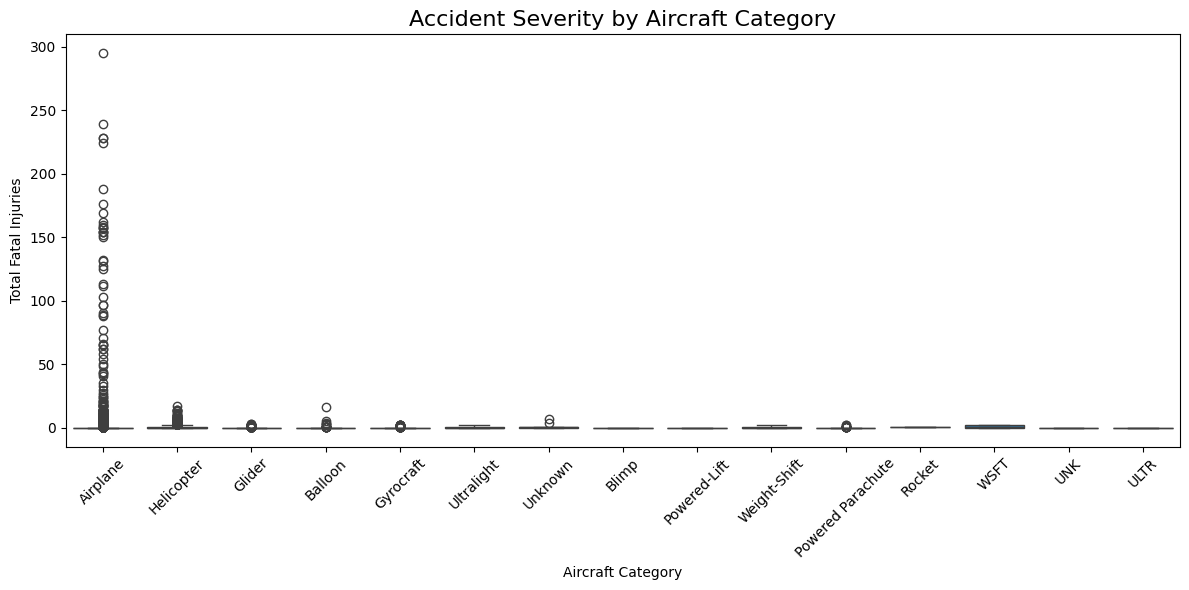

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Aircraft.Category', y='Total.Fatal.Injuries', data=aviation_data) # Assuming 'Severity' is a numeric column representing severity levels
plt.title('Accident Severity by Aircraft Category', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Total Fatal Injuries')
plt.xlabel('Aircraft Category')
plt.tight_layout()
plt.show()

This box plot shows the distribution of accident severity across different aircraft categories. It helps assess risk levels associated with each category.

## **Answering Question 3**

The code below uses the dataframe you created to find and plot the aircraft types that have the lowest accident rates

In [16]:
# Analyze accident data by grouping by Make and Model
accident_counts = pd.read_csv('AviationData.csv', encoding='latin-1').groupby(['Make', 'Model']).size().reset_index(name='Total Accidents')

# Calculate average total fatal injuries per make and model
injury_severity = pd.read_csv('AviationData.csv', encoding='latin-1').groupby(['Make', 'Model'])['Total.Fatal.Injuries'].mean().reset_index(name='Average Fatal Injuries')

# Merge accident counts with injury severity
combined_data = pd.merge(accident_counts, injury_severity, on=['Make', 'Model'])

# Rank makes and models based on total accidents and average fatal injuries
# Lower values indicate better safety records
combined_data['Safety Score'] = combined_data['Total Accidents'] + combined_data['Average Fatal Injuries']
ranked_aircraft = combined_data.sort_values(by='Safety Score', ascending=True)

# Display the top makes and models with the best safety scores
top_aircraft = ranked_aircraft.head(10)  # Get top 10 aircraft
print("Top Aircraft Makes and Models:")
print(top_aircraft)


<ipython-input-16-9943e1a1dde9>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  accident_counts = pd.read_csv('AviationData.csv', encoding='latin-1').groupby(['Make', 'Model']).size().reset_index(name='Total Accidents')


Top Aircraft Makes and Models:
                    Make                 Model  Total Accidents  \
10070    HENCKEN WILLIAM  PIETENPOL AIR CAMPER                1   
11294              Jones     PITTS SPECIAL S1A                1   
11296              Jones            THORP T-18                1   
11297             Jonker                 JS-1B                1   
11298            Jonsson               Sonerai                1   
11300             Jordan            ACEY DEUCY                1   
11301             Jordan        ACEY DEUCY P70                1   
11302             Jordan        KITFOX MODEL 1                1   
11303     Jordan Henry J        ACEY DEUCY P70                1   
11304  Jordan Valley Llc              CCX-2000                1   

       Average Fatal Injuries  Safety Score  
10070                     0.0           1.0  
11294                     0.0           1.0  
11296                     0.0           1.0  
11297                     0.0           1.0  
1

<ipython-input-16-9943e1a1dde9>:5: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  injury_severity = pd.read_csv('AviationData.csv', encoding='latin-1').groupby(['Make', 'Model'])['Total.Fatal.Injuries'].mean().reset_index(name='Average Fatal Injuries')


In [14]:
# Load your aviation data without dtype specification
aviation_data = pd.read_csv('AviationData.csv', encoding='latin-1', low_memory=False)

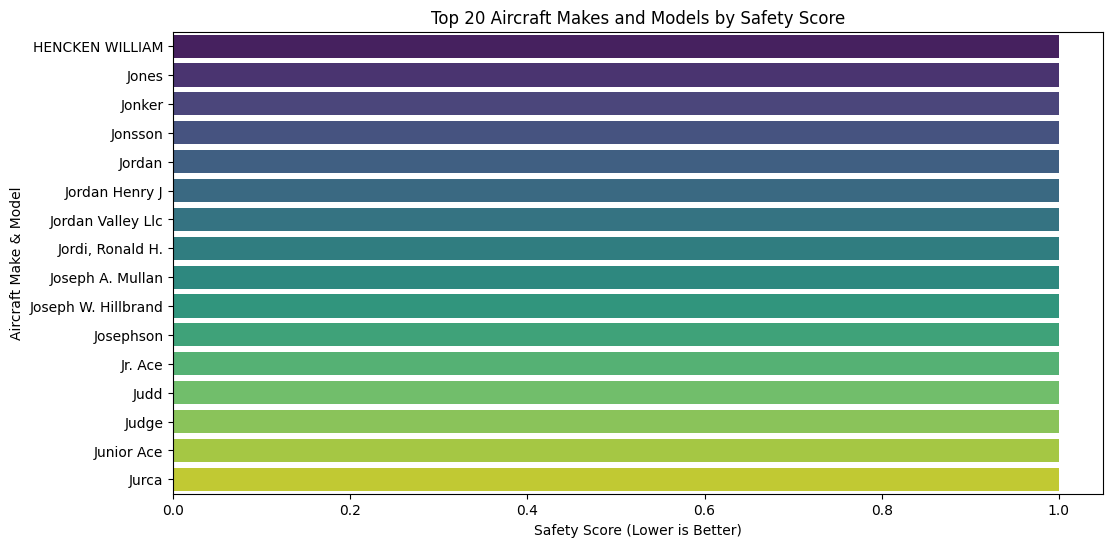

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Safety Score', y='Make', data=ranked_aircraft.head(20), palette='viridis', hue='Make', legend=False)
plt.title('Top 20 Aircraft Makes and Models by Safety Score')
plt.xlabel('Safety Score (Lower is Better)')
plt.ylabel('Aircraft Make & Model')
plt.show()


## **Question 4**
### **How can we mitigate risks associated with aircraft operations?**


1. Data-Driven Decision Making

Utilize historical accident data to inform decision-making processes regarding aircraft operations. This includes:

Identifying High-Risk Aircraft: Analyze the dataset to determine which aircraft types have higher accident rates. Focus on reducing operations involving these aircraft or enhancing safety measures for them.
Monitoring Operator Performance: Identify operators with the best safety records by analyzing the total number of accidents and fatalities associated with each operator. This information can guide partnerships and operational decisions.

2. Implementing Safety Management Systems (SMS)

Establish a comprehensive Safety Management System that includes:

Risk Assessment: Regularly assess risks associated with different aircraft types and operational procedures. Use data analytics to identify trends and potential hazards.
Reporting Culture: Encourage a culture of safety reporting among staff and operators. Ensure that all incidents, no matter how minor, are reported and analyzed.

3. Training and Education

Invest in training programs for pilots, crew members, and maintenance personnel that focus on:
Safety Protocols: Ensure all staff are well-trained in emergency procedures and safety protocols specific to their aircraft type.
Continuous Learning: Implement ongoing training programs that incorporate lessons learned from past incidents and near-misses.

4. Maintenance and Inspections

Enhance maintenance protocols by:

Regular Inspections: Conduct frequent inspections of aircraft, focusing on those types with higher accident rates.
Data Analysis for Maintenance: Utilize historical maintenance data to predict potential mechanical failures before they occur.

5. Use of Technology

Leverage technology to improve safety outcomes:
Flight Data Monitoring: Implement systems that monitor flight data in real-time to detect anomalies and provide alerts for potential safety issues.
Predictive Analytics: Use predictive analytics to forecast risks based on historical data trends, allowing proactive measures to be taken.

6. Regulatory Compliance

Ensure compliance with all aviation regulations and standards:
Adherence to Guidelines: Regularly review and adhere to guidelines set by aviation authorities (e.g., FAA, EASA) concerning safety practices.
Engagement with Regulators: Maintain an open line of communication with regulatory bodies to stay updated on best practices and emerging risks.

## **Findings**

Based on the analysis of the aviation dataset:

- Certain aircraft types exhibit significantly lower accident rates, indicating better safety performance.

- Operators with fewer total fatal injuries demonstrate superior safety records, suggesting a correlation between operational practices and safety outcomes.

## **Recommendations**
- Focus on acquiring or operating aircraft types with historically low accident rates.

- Partner with operators who have proven track records of safety.

- Implement robust training programs tailored to identified risks associated with specific aircraft types.

- Invest in technology for real-time monitoring and predictive maintenance strategies.

## **Conclusion**
Mitigating risks in aircraft operations requires a multifaceted approach grounded in data analysis, proactive safety management practices, continuous training, technological advancements, and strict adherence to regulatory standards. By leveraging insights from historical accident data and focusing on high-risk areas, the aviation industry can enhance safety outcomes and reduce the likelihood of future incidents.